# Visualizing Adversarial Attacks on DNNs
_"Two machine learning students cross the street. One of them spots a truck and says: "Look out, there´s a deer!"_

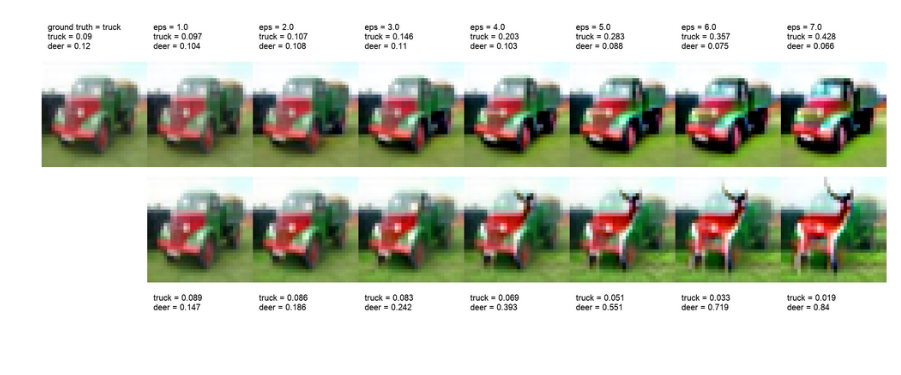

## Table of Content
* Introduction
* Installation
* Requirements to the developement environment for integration
* Basic Overview
* Folder structure
* Useful Information for Software Expansion
    * How to add a new Dataset
    * How to add new models               
    * Unsolved Problems/ Difficulties                         

## Introduction

A graphical Interface which demonstrates the effect of selectable adverserial attacks on DNS, illustrated on Datasets of Images.

## Installation
1. Dowload the *Visualizing Adversarial Attacks on DNNs* Repository from GitLab.
2. For the Datasets 

### Requirements to the developement environment for integration
   * CUDA Technology
   * Python runable Environment
   * Usage of the library Pytorch
   * arial.ttf needs to be in the same directory like the Visual_Attacks_On_DNNs file.
   
   
## Basic Overview

The Menu is devided into two major sections: ***The Main Menu*** and ***the Attack Selection.***

###  The Model Selection

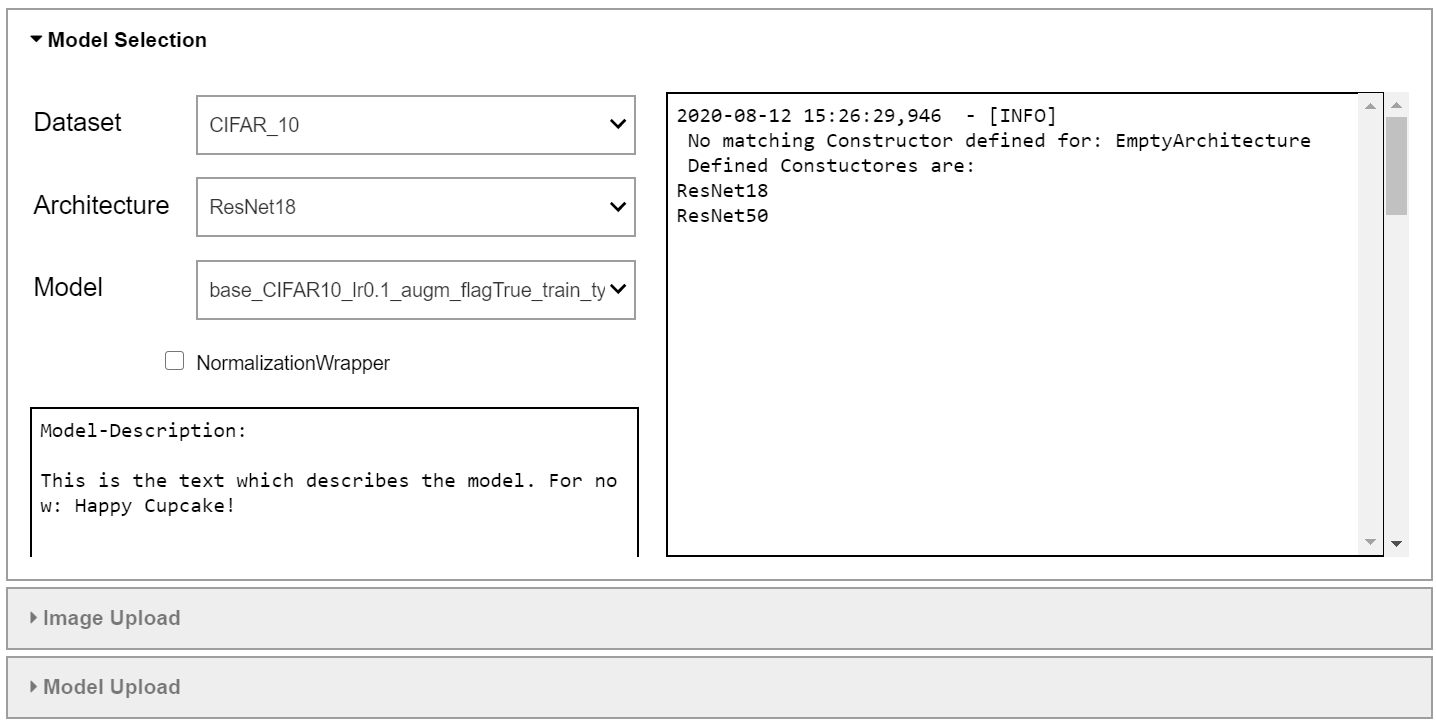


Provided are 3 Dropdown Menus to chose a specific *Dataset*, *Architecture* and *Model.* \
Furthermore a checkbox enables to *activate Normalization.* \
Below is a Textbox to print the *Model-Description* of the chosen model. \
The large Textbox on the right side of the Menu provides Information about the programm processes.

### Upload Images

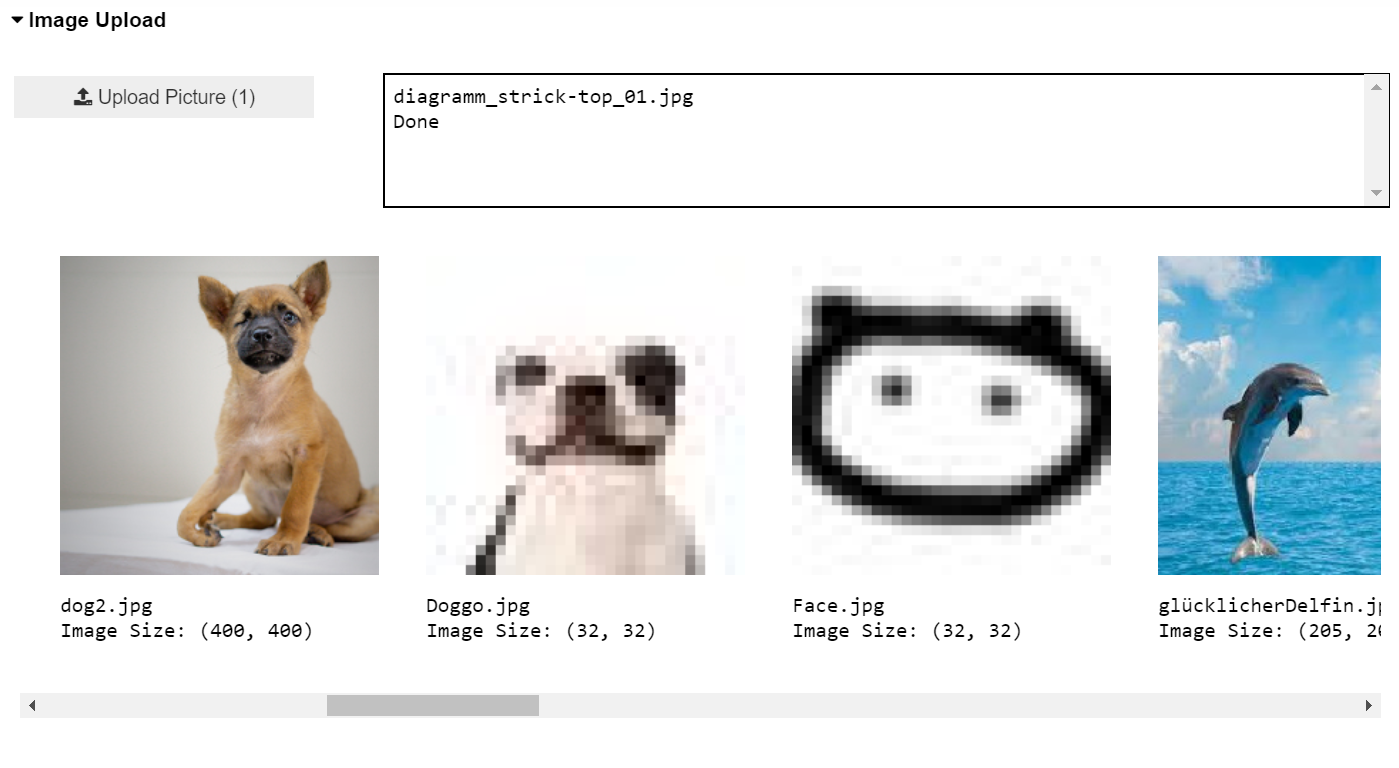



Additional instead of using a Dataset, the user can *upload Images* as well. Optional formats are: *.jpg','.JPG', '.jpeg', '.JPEG', '.png', '.PNG', '.ppm', '.PPM', '.bmp', '.BMP'*. \
The images need to be in an RBG colorspace, RGBA is not supported. \
\
The Textbox next to the Upload Picture Button indicates *filename* and *format* of the current uploaded Image. When the Upload is *done*, a notification in the Textbox appears.
\
The *Image Slider* beneath shows all the uploaded Images and gives Information about their name and Image size. \
Use _*double click*_ to select and deselect Images.
\
To _delete_ uploaded Images, you have to remove them from the _upload folder_.


### Upload Model
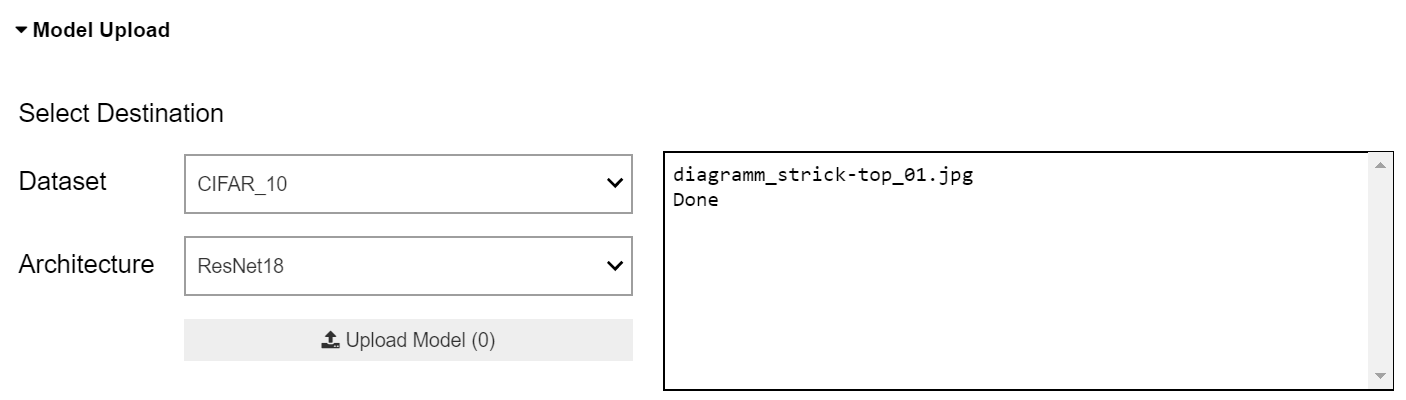

*Model Upload* allows the User to upload another model. 

###  The Attack Selection
There are five attacks offered for selection: *FGM*, *PGD*, *Monotone PGD*, *ArgminPGD* and *DummyAttack*. \
Each Attack has its own menu to adjust the attack parameters as wished.




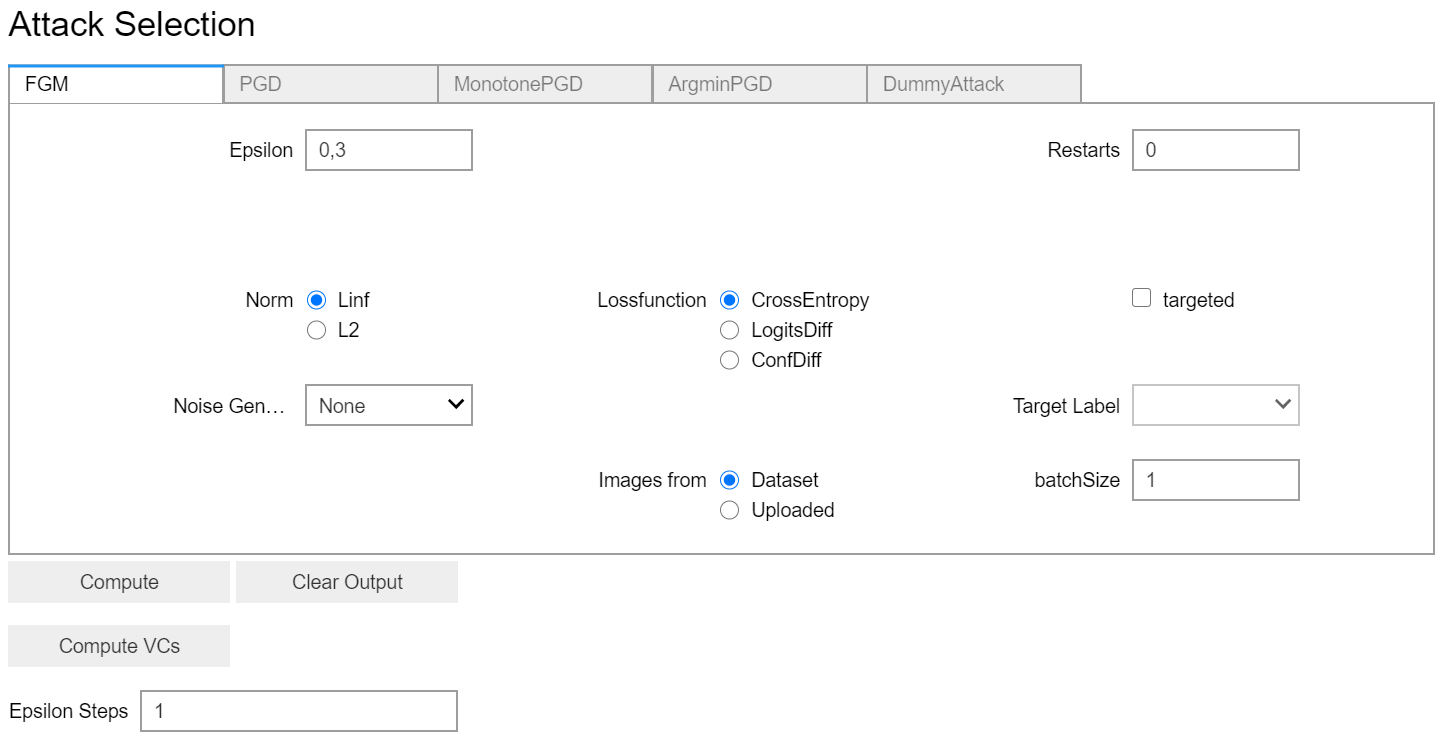





The *Compute*-Button executes the Instruction to apply the chosen attack on the chosen dataset, architecture and model. 

For the Selection of uploaded Images to apply an attack on, it's **necessary** to *choose* a *label*.

### Targeted attacks
###### 1. If you want to use a predefined dataset
Check the targeted Checkbox.\
You use the targetedLabel dropdown menu to select a label of the selected Dataset.\
The class probability of every image is maximized towards that selected targetlabel, no matter what batchsize you select.
###### 2. If you want to use your own uploaded Images
Check the targeted Checkbox.\
Select the "Uploaded" option on the "Images from" Radiobutton.\
Select the images you want to use. Choose the correct label for each image, and use the targetedLabel dropdown menu to select a label of the selected Dataset. The class probability of every image is maximized towards that selected targetlabel, no matter what images you select.

### Visual Counterfactuals (VCs)

The parameter *Epsilon-Steps* specifies the number of intermediate steps to devide the selected *epsilon*.
Further, *Epsilon-Steps* sets up the amount of corresponding Images that are shown. For each epsilon-step a new attack is generated and the attacked image is illustrated in the row.
\
Visual Counterfactuals only work on uploaded images if the ground truth is not the correct label. Because Visual Counterfactuals only perform well on misclassified images.

### Output:
There are three Output-Variations: 

##### 1. The results that the model generates for the attacked image:

The title declares the *ground truth* of the attacked image.

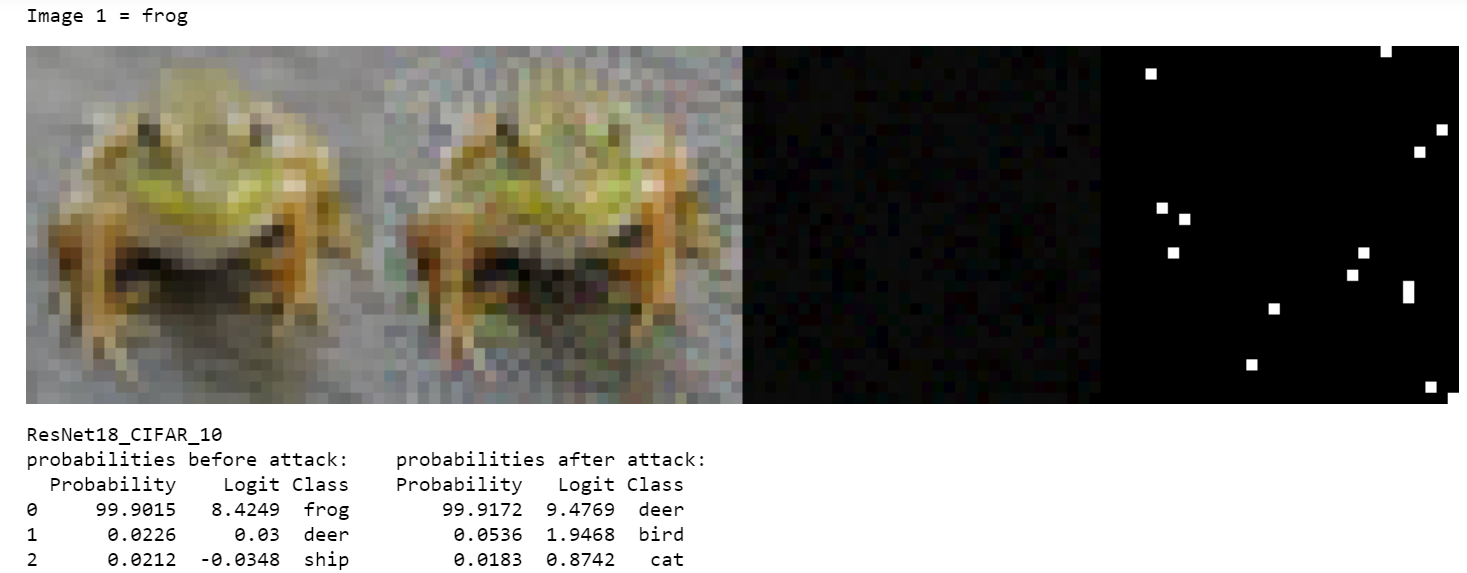

The four Images illustrate the following (left to right): 
   * Nr.1 shows the original image without any alterations,
   * Nr.2 shows the image after it is attacked, 
   * Nr.3 shows the difference between the pictures 
   * Nr.4 shows which pixels changed at all (black = pixel changed, white = pixel unchanged)  

Below the images are the calculated probabilities for the classes of the model, *before* and *after* the attack . Only the three classes with the highest probabilities are displayed.  

##### 2.  **'save Trajectory'** is ticked (not available in FGM):

An animation is generated in which all iterations from the attack are presented as images. \
To start the animation, press the *Play*-Button. It speeds up with each additional click. \
The results per iteration are displayed similar to Output Variation 1. 

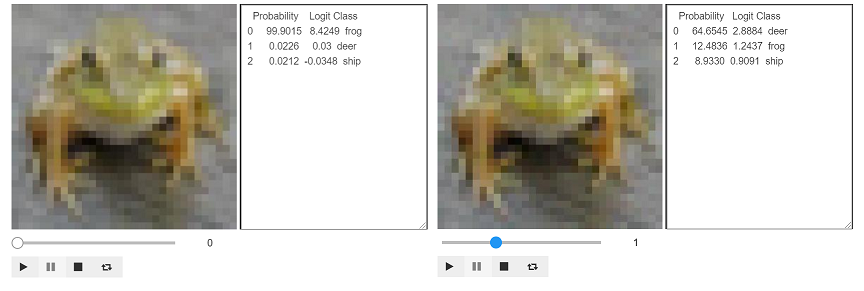
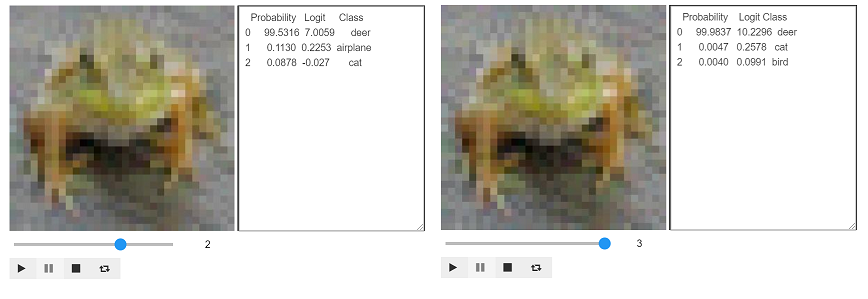






A graphic, next to the results, plots the probabilities of the top classes of the first an last iteration for all iteration rounds. \
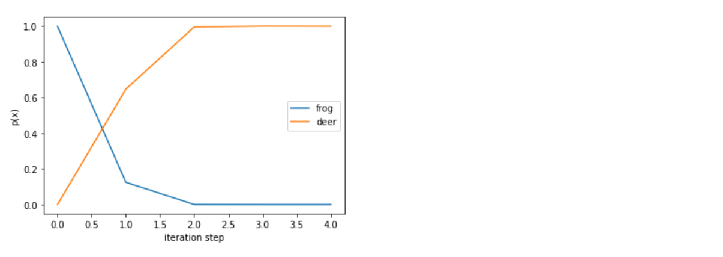



##### 3. *Compute VCs* is instructed: 


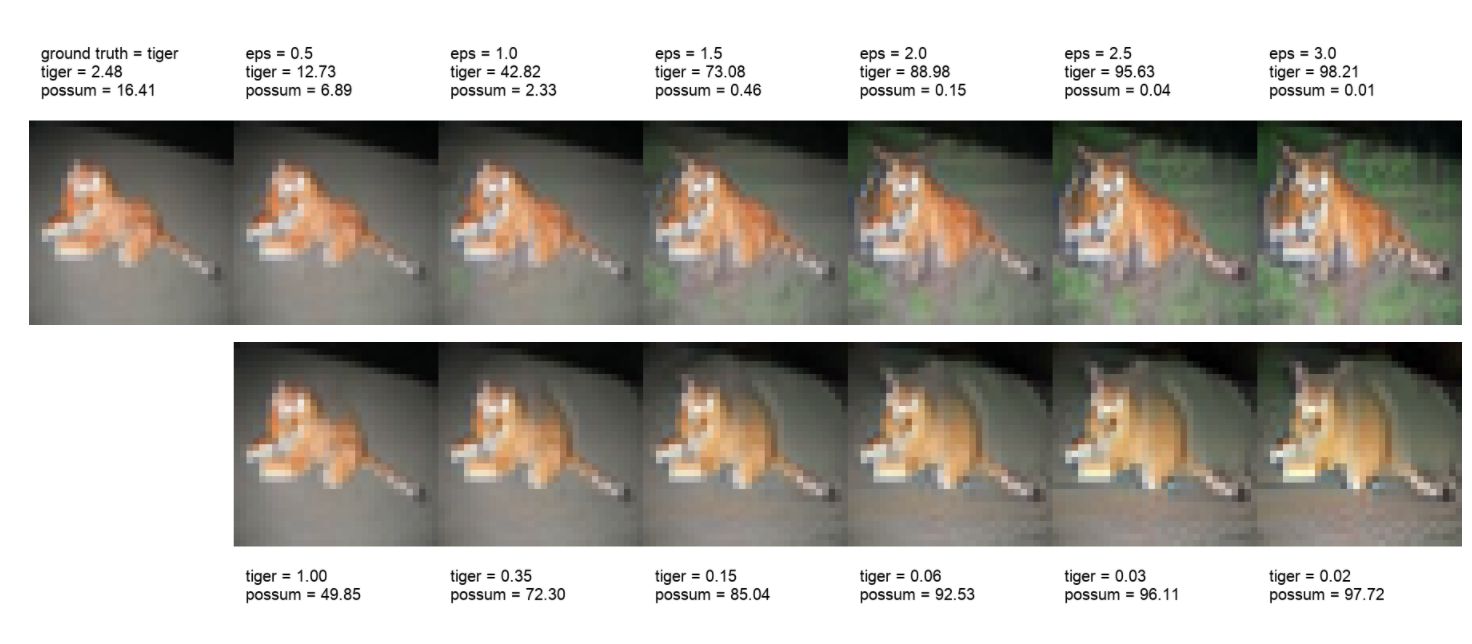

The *visual counterfactuals* are build into rows: \
In the first row, the probability of the ground truth class is maximized and the corresponding probabilities are shown above. \
In the second line, the probability of the missclassified Image-class is maximized and the corresponding probabilities are shown beneath.
\
The Button *Clear Output* erases the Outputfield.



## Folder structure
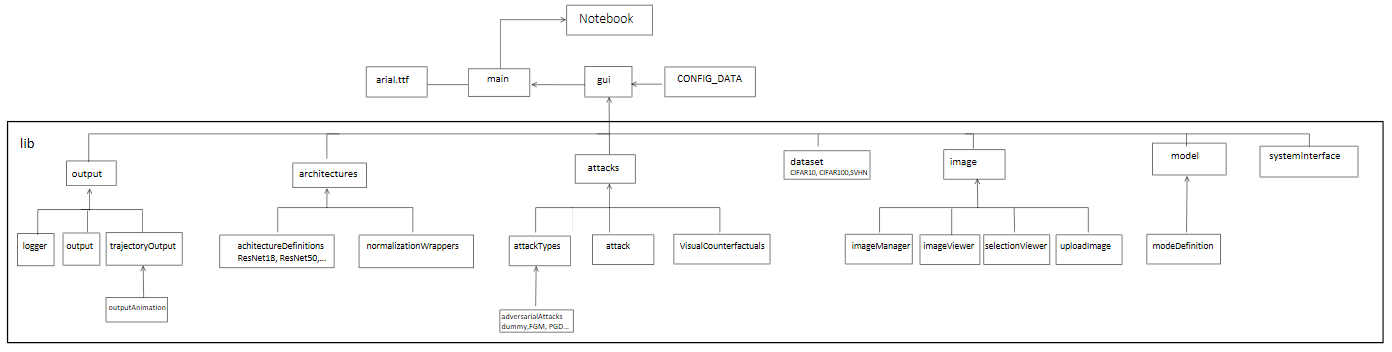




## Useful Information for Software Expansion
    
#### How to add a new pytorch Dataset
To add a new Dataset realize the following steps:
1. Create a new wrapper class \
As template use one of the already existing dataset classes in the folder datasets (path: progarmmData/lib/datasets).
Some attributes need to be adapted to the specific dataset. \
The key values of *datasetArgs* are taken from the implemented pytorch class. \
The key-field *'root'*, where the actual DatasetFiles are saved, will be dynamically assigned by the GUI. It has the following structure:
'cwd/Dataset/<DATASET_NAME>' where *cwd* is the path to the program-location.
When manually moving datasets to the 'Dataset'-folder, take into account that the name of the Subfolder must be the same as the datasetname in the 'model'-folder e.g. (CIFAR_10). 

Description of the functions: 
The Function *loadDataset* calls the dataset constructor of the related pytorch dataset class.
*assignclasses* uses this method to assign the classes of this dataset as a list of strings to the attribute *self.classes*.

2. Import the wrapper class to the __init__ file in the same folder.
3. Add a new record to the 'DATASETS' Dictionary in the configData file. The key field determines the name of the Dataset. The value field has to be the Constructor of the wrapper class as a Callback Function.

Example: 'DATASETS':{'CIFAR_10':Cifar10, 'CIFAR_100':Cifar100, 'SVHN':SVHN}

##### Some example Dataset classes: 

```
import torch
from torchvision import datasets, transforms

class Cifar10():
    def __init__(self,name, locationOfDatasetImages):
        self.datasetArgs={
            'root':locationOfDatasetImages,
            'train':True,
            'transform':transforms.Compose([transforms.ToTensor()]),
            'target_transform':None,
            'download':True
        }
        self.name_= name
        self.img_size =(32, 32)
        self.dataset=None
        self.classes=None
        self.loadDataset()
        self.assignClasses()
        self.numberOfClasses=len(self.classes)
        
    def loadDataset(self):
        self.dataset=datasets.CIFAR10(**self.datasetArgs)
        
    def assignClasses(self):
        self.classes=self.dataset.classes



```


**note** this is a good comparison to notice, that not every pytorch class has implemented class labels.


```
import torch
from torchvision import datasets, transforms

class SVHN():
    def __init__(self,name, locationOfDatasetImages):
        self.datasetArgs={
            'root':locationOfDatasetImages,
            'split':'train',
            'transform':transforms.Compose([transforms.ToTensor()]),
            'target_transform':None,
            'download':False
        }
        self.name=name
        self.img_size =(32, 32)
        self.dataset=None
        self.classes=None
        self.loadDataset()
        self.assignClasses()
        self.numberOfClasses=len(self.classes)
        
    def loadDataset(self):
        self.dataset=datasets.SVHN(**self.datasetArgs)
        
    def assignClasses(self):
        self.classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

```


### How to add new models

In general, models are stored in the *models* folder. The directory-layer structure is conceptualized in this way: dataset\architecture\modelname\model. 

#### Use the GUI to upload new models:
Lets assume that the requested dataset and architecture are already integrated. \
First: set the allowed upload size to 1GB. For this aim, start jupyter notebook in the shell and add the option *--config="jupyter_notebook_config.py"*
The jupyter_notebook_config.py file needs to be in the same folder as the utilized Adverserial_Attacks_on_DNNs.ipynb.

* go to the *'Model Upload'* Menu in the GUI
* select a destination for the file with the dropdownMenus (the options show all Architectures and Datasets defined in the configData file; the folders will be created if they don't exist)
* upload a model and an optional description file via the upload-widget (accepted datatypes are *.pt* or *.pth* and *.txt*)

A notification will araise in the textfield as soon as the upload is successfully completed.

To provide a description file for the model, upload a .txt file with **exactly** the same name (simultanious upload of model and description file is possible). The description.txt file needs to be stored in the same destination. 


### Unsolved Problems/ Difficulties
How to add new attacks (was not required), add a none pytorch dataset

